# Analisis Data Wine Quality - Proyek Akhir

**Dataset:** Red Wine Quality

**Tujuan:** Menerapkan keterampilan analisis data dan machine learning untuk mempelajari karakteristik wine dan mempersiapkan data untuk pembelajaran mesin.

## [1] Ringkasan Dataset

Dataset ini berisi informasi tentang kualitas wine merah berdasarkan karakteristik fisikokimia.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

In [2]:
# Load dataset
df = pd.read_csv('winequality-red.csv', sep=';')

print("=" * 60)
print("RINGKASAN DATASET WINE QUALITY")
print("=" * 60)
print(f"\n📊 Ukuran Dataset: {df.shape[0]} baris x {df.shape[1]} kolom")
print(f"\n📋 Variabel-variabel:")
print(df.columns.tolist())
print(f"\n🎯 Variabel Target: quality (rating 0-10)")
print(f"\n🔢 Tipe Data:")
print(df.dtypes)

# Display first few rows
print("\n📄 Sample Data:")
df.head()

RINGKASAN DATASET WINE QUALITY

📊 Ukuran Dataset: 1599 baris x 12 kolom

📋 Variabel-variabel:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

🎯 Variabel Target: quality (rating 0-10)

🔢 Tipe Data:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

📄 Sample Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Summary statistics
print("\n📈 Statistik Deskriptif:")
df.describe()


📈 Statistik Deskriptif:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Check missing values and duplicates
print("\n🔍 Kualitas Data:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"\nDistribusi Quality:")
print(df['quality'].value_counts().sort_index())


🔍 Kualitas Data:
Missing values: 0
Duplicate rows: 240

Distribusi Quality:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## [2] Rencana Eksplorasi Data

### Strategi Eksplorasi:

1. **Analisis Univariat**: Distribusi setiap fitur
2. **Analisis Bivariat**: Korelasi fitur dengan quality
3. **Analisis Multivariat**: Interaksi antar fitur
4. **Outlier Detection**: Identifikasi nilai ekstrem

### Pertanyaan Kunci:
- Fitur mana yang paling berpengaruh terhadap kualitas wine?
- Apakah ada korelasi kuat antar fitur?
- Bagaimana distribusi kualitas wine?
- Apakah ada outlier yang perlu ditangani?

### Visualisasi yang Akan Dibuat:
- Histograms untuk distribusi
- Box plots untuk outlier detection
- Correlation heatmap
- Scatter plots untuk relationships
- Violin plots untuk quality comparison

## [3] Analisis Data Eksploratif (EDA)

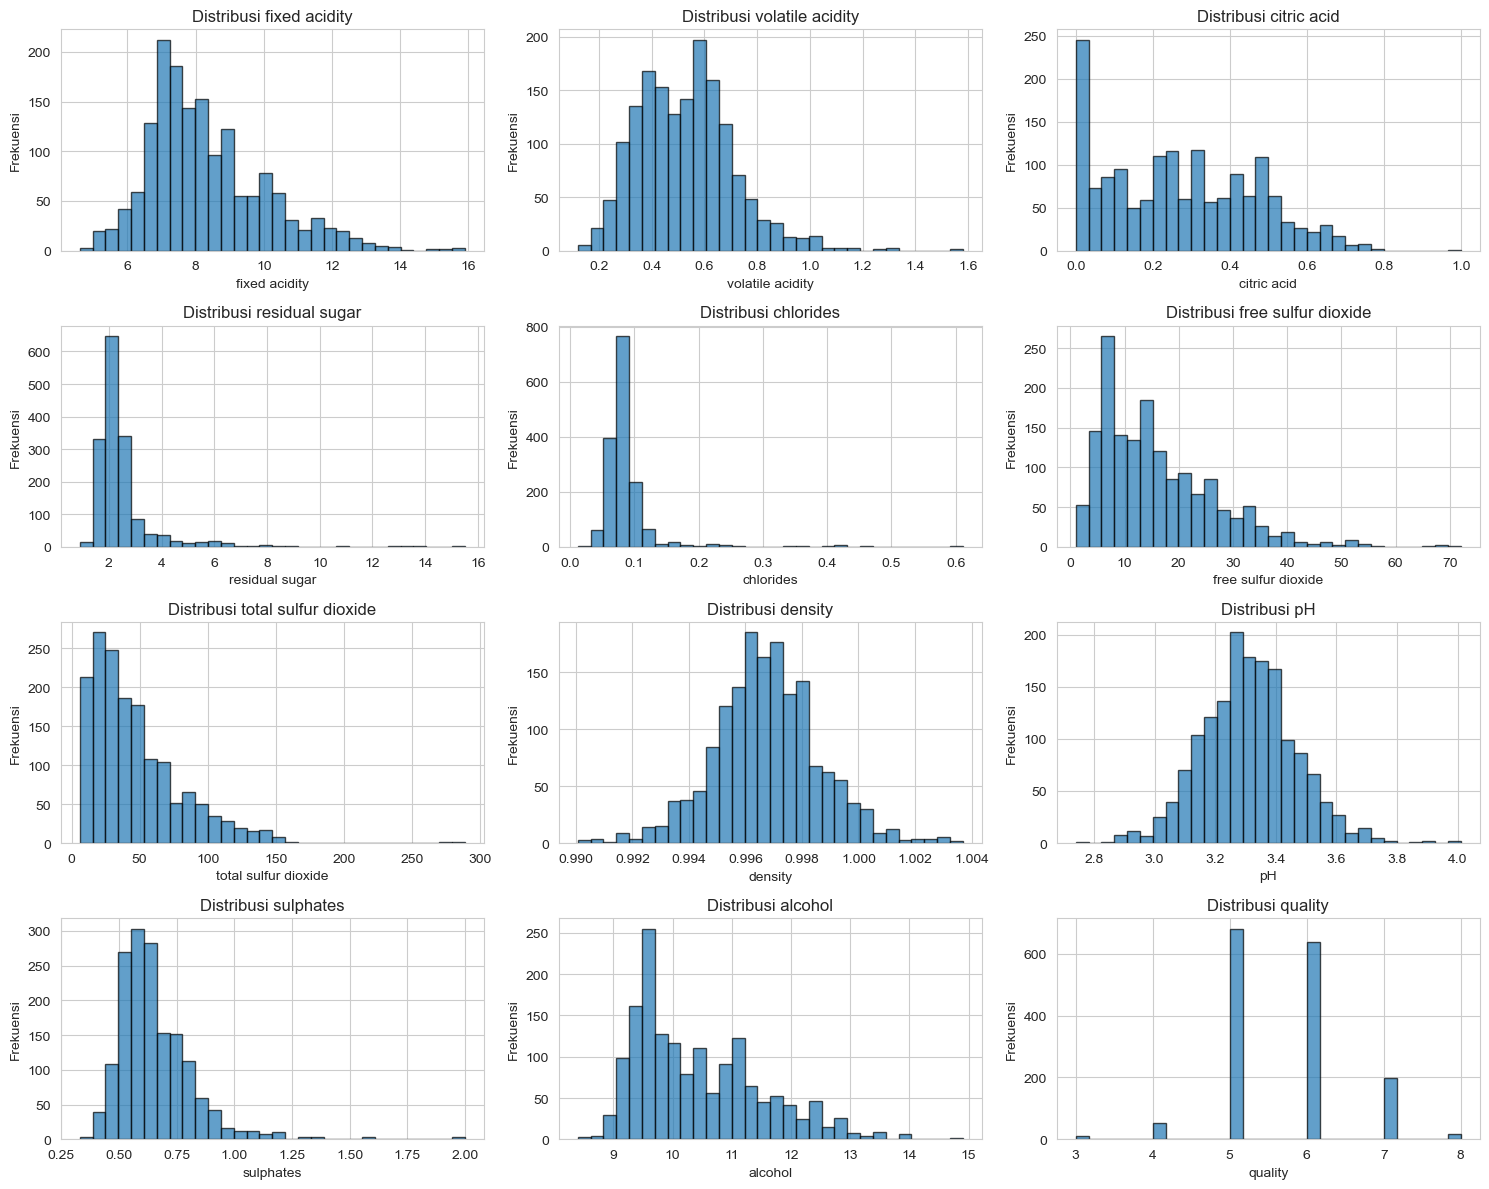

✅ Insight: Sebagian besar fitur menunjukkan distribusi yang tidak normal (skewed).


In [5]:
# Distribution of all features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

print("✅ Insight: Sebagian besar fitur menunjukkan distribusi yang tidak normal (skewed).")

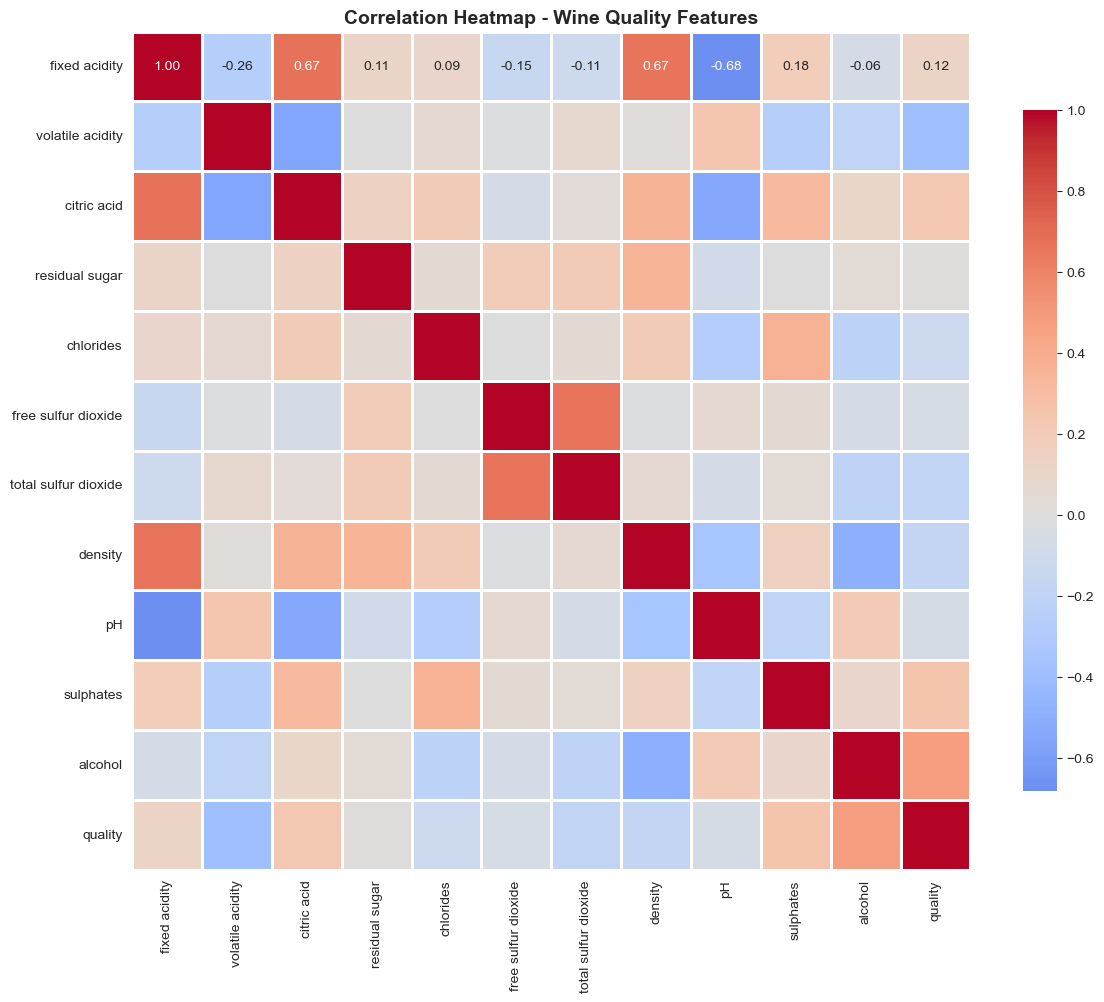


🔗 Korelasi dengan Quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [6]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Wine Quality Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with quality
quality_corr = corr['quality'].sort_values(ascending=False)
print("\n🔗 Korelasi dengan Quality:")
print(quality_corr)

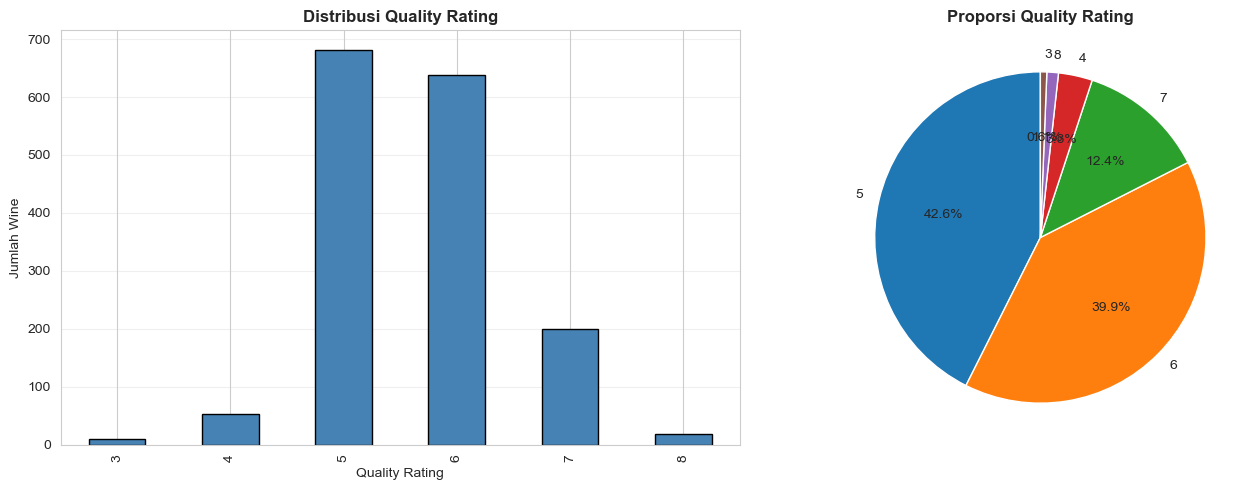

In [7]:
# Quality distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribusi Quality Rating', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Quality Rating')
axes[0].set_ylabel('Jumlah Wine')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
df['quality'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('Proporsi Quality Rating', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

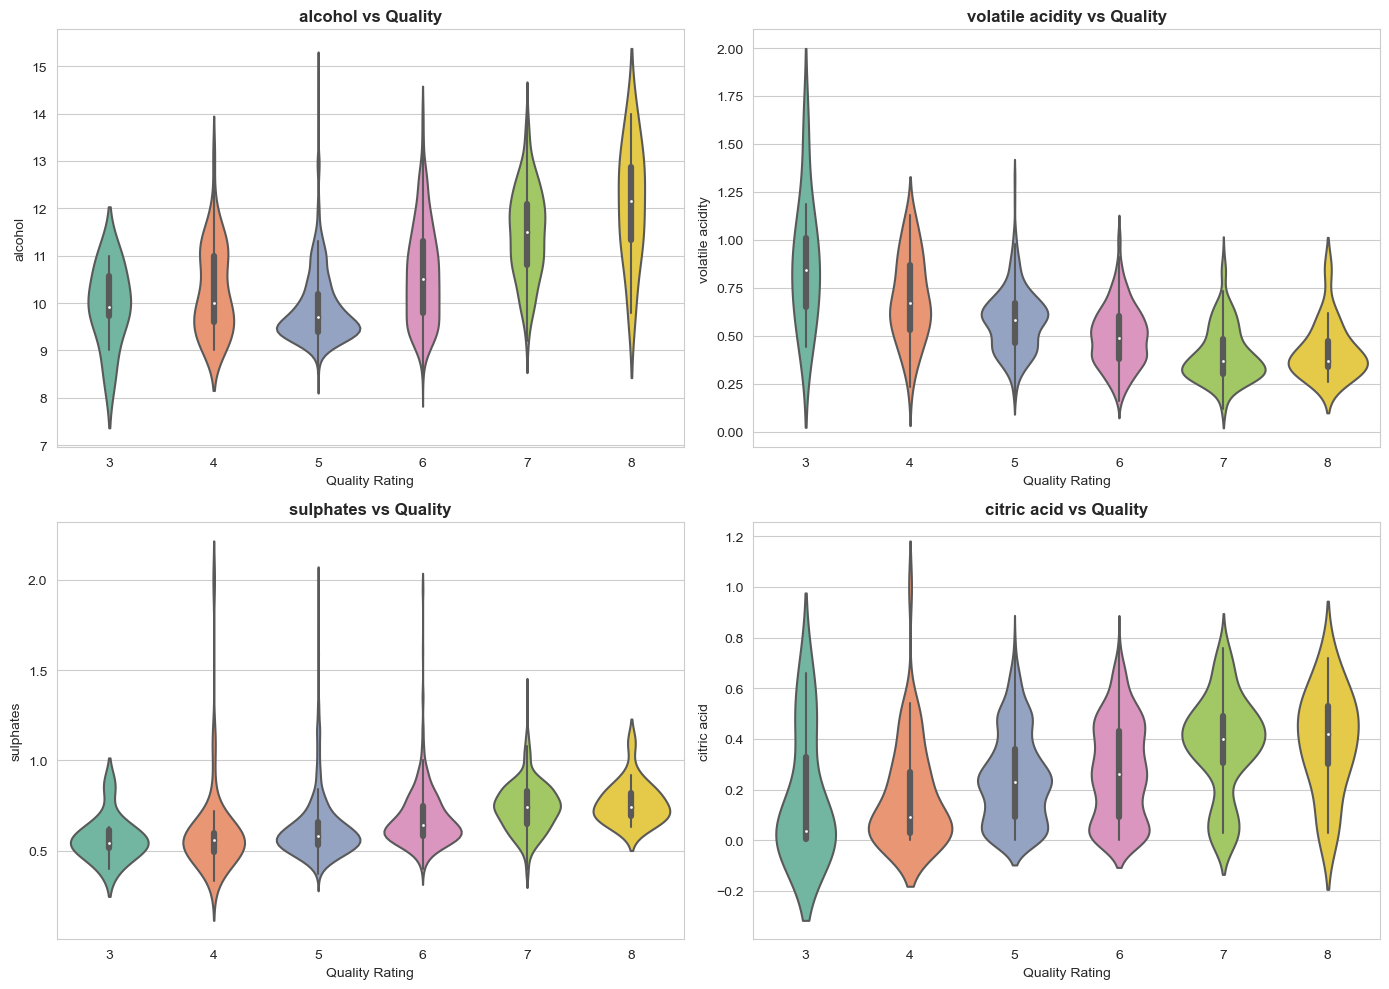

In [8]:
# Top features vs quality
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    sns.violinplot(x='quality', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} vs Quality', fontweight='bold')
    axes[i].set_xlabel('Quality Rating')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

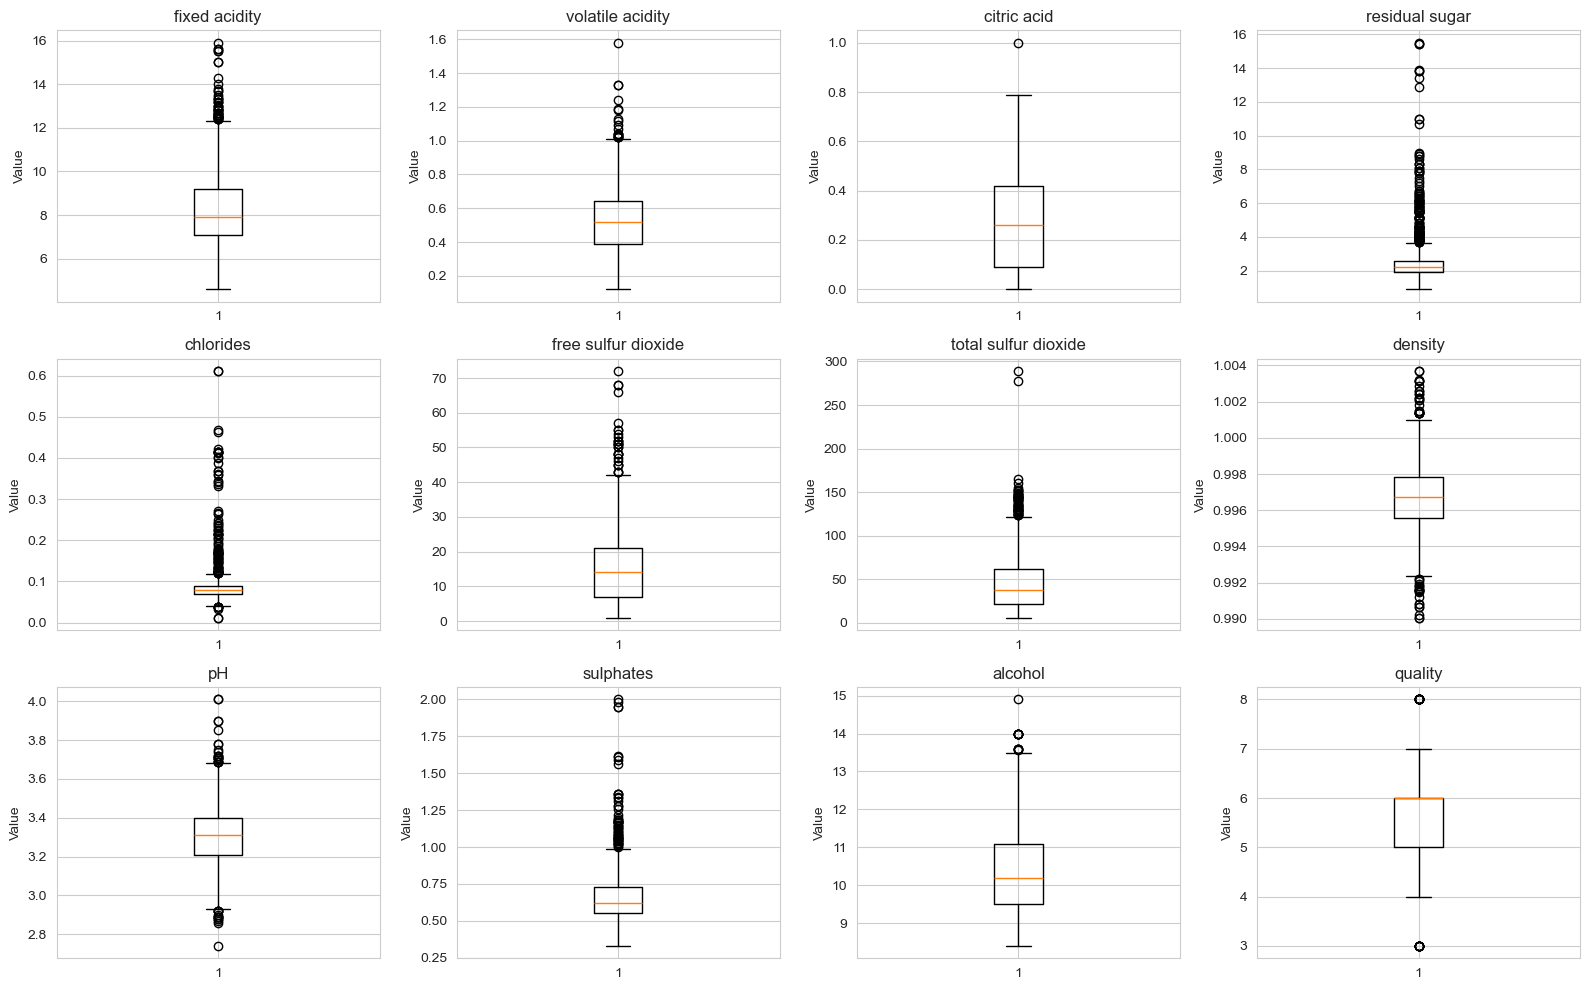

🔍 Insight: Terlihat beberapa outlier pada berbagai fitur.


In [9]:
# Outlier detection with boxplots
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

print("🔍 Insight: Terlihat beberapa outlier pada berbagai fitur.")

## [4] Pembersihan Data & Rekayasa Fitur

In [10]:
# Create a copy for preprocessing
df_clean = df.copy()

print("🧹 PEMBERSIHAN DATA")
print("=" * 60)

# 1. Check missing values
print("\n1. Missing Values:")
print(f"   Total missing: {df_clean.isnull().sum().sum()}")
print("   ✅ Tidak ada missing values")

# 2. Remove duplicates
duplicates = df_clean.duplicated().sum()
print(f"\n2. Duplicate Rows:")
print(f"   Found {duplicates} duplicates")
df_clean = df_clean.drop_duplicates()
print(f"   ✅ Removed duplicates. New shape: {df_clean.shape}")

# 3. Handle outliers (using IQR method)
print(f"\n3. Outlier Detection (IQR method):")
outlier_count = {}

for col in df_clean.select_dtypes(include=[np.number]).columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    outlier_count[col] = outliers

for col, count in sorted(outlier_count.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        print(f"   {col}: {count} outliers")

print("   📝 Note: Outliers dipertahankan karena bisa jadi wine berkualitas unik")

🧹 PEMBERSIHAN DATA

1. Missing Values:
   Total missing: 0
   ✅ Tidak ada missing values

2. Duplicate Rows:
   Found 240 duplicates
   ✅ Removed duplicates. New shape: (1359, 12)

3. Outlier Detection (IQR method):
   residual sugar: 126 outliers
   chlorides: 87 outliers
   sulphates: 55 outliers
   total sulfur dioxide: 45 outliers
   fixed acidity: 41 outliers
   density: 35 outliers
   pH: 28 outliers
   quality: 27 outliers
   free sulfur dioxide: 26 outliers
   volatile acidity: 19 outliers
   alcohol: 12 outliers
   citric acid: 1 outliers
   📝 Note: Outliers dipertahankan karena bisa jadi wine berkualitas unik


In [11]:
# Feature Engineering
print("\n⚙️ FEATURE ENGINEERING")
print("=" * 60)

# 1. Total Acidity
df_clean['total_acidity'] = df_clean['fixed acidity'] + df_clean['volatile acidity'] + df_clean['citric acid']
print("\n1. ✅ Created: total_acidity")

# 2. Acidity Ratio
df_clean['acidity_ratio'] = df_clean['fixed acidity'] / (df_clean['volatile acidity'] + 0.001)
print("2. ✅ Created: acidity_ratio (fixed/volatile)")

# 3. Sulfur Ratio
df_clean['sulfur_ratio'] = df_clean['free sulfur dioxide'] / (df_clean['total sulfur dioxide'] + 0.001)
print("3. ✅ Created: sulfur_ratio (free/total)")

# 4. Alcohol Category
df_clean['alcohol_category'] = pd.cut(df_clean['alcohol'], 
                                       bins=[0, 9.5, 10.5, 15], 
                                       labels=['Low', 'Medium', 'High'])
print("4. ✅ Created: alcohol_category (Low/Medium/High)")

# 5. Quality Category
df_clean['quality_category'] = pd.cut(df_clean['quality'], 
                                       bins=[0, 5, 6, 10], 
                                       labels=['Low', 'Medium', 'High'])
print("5. ✅ Created: quality_category (Low/Medium/High)")

print(f"\n📊 New shape: {df_clean.shape}")
print(f"New features: {list(df_clean.columns[-5:])}")


⚙️ FEATURE ENGINEERING

1. ✅ Created: total_acidity
2. ✅ Created: acidity_ratio (fixed/volatile)
3. ✅ Created: sulfur_ratio (free/total)
4. ✅ Created: alcohol_category (Low/Medium/High)
5. ✅ Created: quality_category (Low/Medium/High)

📊 New shape: (1359, 17)
New features: ['total_acidity', 'acidity_ratio', 'sulfur_ratio', 'alcohol_category', 'quality_category']


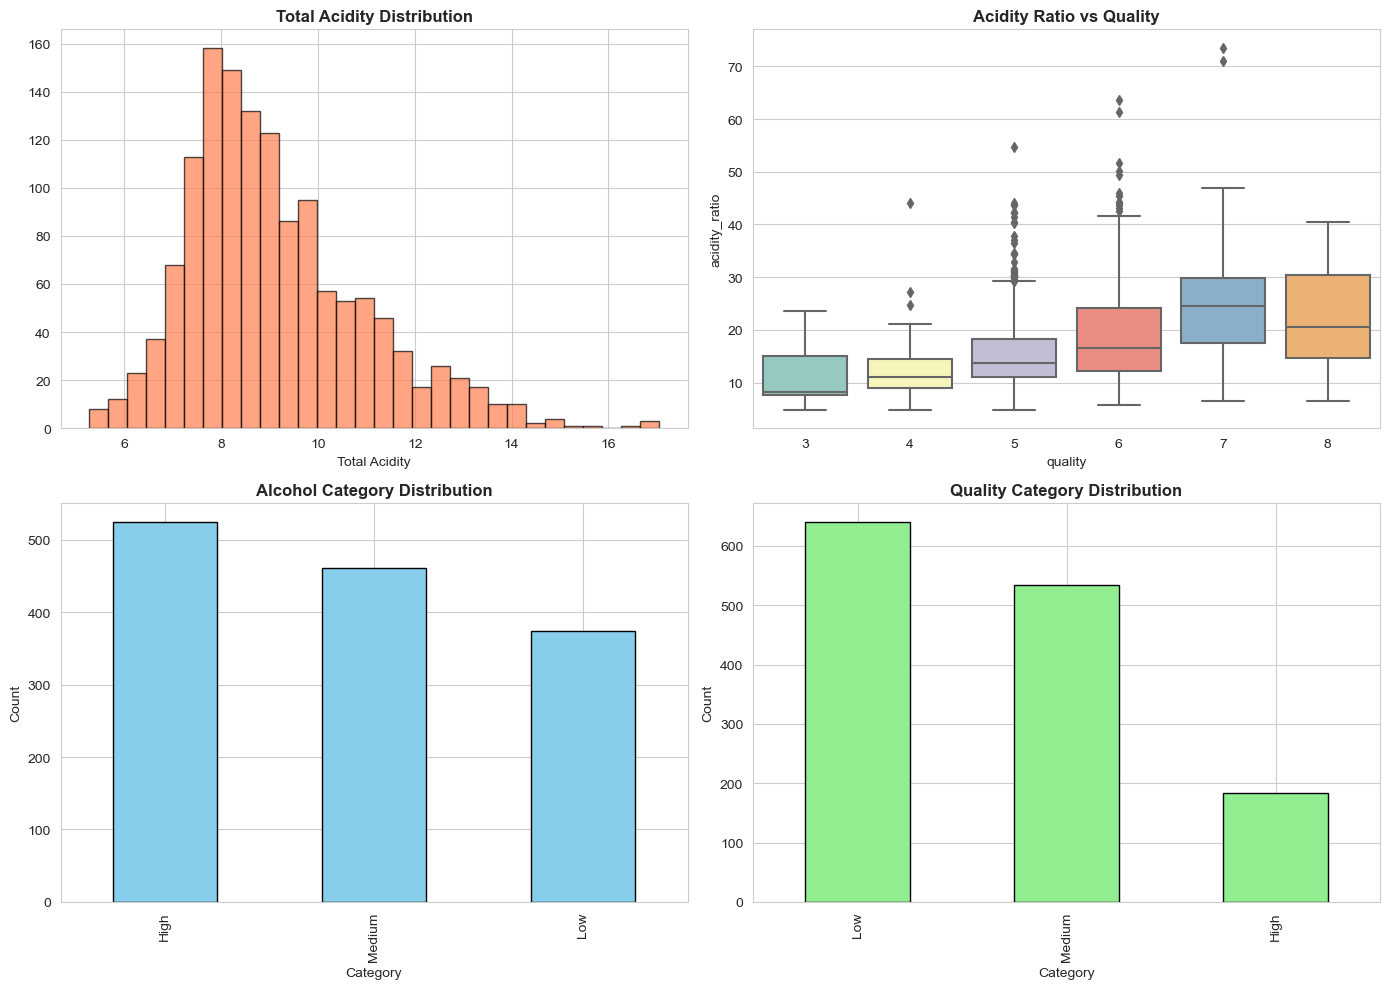

In [12]:
# Visualize new features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total acidity distribution
axes[0, 0].hist(df_clean['total_acidity'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 0].set_title('Total Acidity Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Total Acidity')

# Acidity ratio vs quality
sns.boxplot(x='quality', y='acidity_ratio', data=df_clean, ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Acidity Ratio vs Quality', fontweight='bold')

# Alcohol category distribution
df_clean['alcohol_category'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue', edgecolor='black')
axes[1, 0].set_title('Alcohol Category Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')

# Quality category distribution
df_clean['quality_category'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Quality Category Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## [5] Temuan Kunci & Wawasan

### 🔍 Temuan Utama:

1. **Alcohol adalah Faktor Terkuat**
   - Korelasi positif tertinggi dengan quality (r ≈ 0.48)
   - Wine dengan alcohol lebih tinggi cenderung mendapat rating lebih baik

2. **Volatile Acidity Berdampak Negatif**
   - Korelasi negatif kuat dengan quality (r ≈ -0.39)
   - Volatile acidity tinggi menurunkan kualitas wine

3. **Distribusi Quality Tidak Seimbang**
   - Mayoritas wine berada di rating 5-6 (normal quality)
   - Wine dengan rating ekstrem (3-4 atau 7-8) sangat sedikit
   - Ini akan menjadi tantangan untuk klasifikasi

4. **Sulphates Berpengaruh Positif**
   - Korelasi positif dengan quality
   - Sulphates membantu preservasi dan karakteristik wine

5. **Citric Acid Meningkatkan Kesegaran**
   - Korelasi positif dengan quality
   - Memberikan kesegaran pada wine

### 💡 Wawasan untuk Winemakers:

- **Tingkatkan alcohol content** dalam batas yang wajar untuk meningkatkan kualitas
- **Kontrol volatile acidity** dengan ketat selama fermentasi
- **Optimasi sulphates dan citric acid** untuk balance yang baik
- Perhatikan **total acidity balance** untuk hasil optimal

## [6] Formulasi Hipotesis

Berdasarkan EDA, saya merumuskan 3 hipotesis untuk diuji:

### **Hipotesis 1: Alcohol Content dan Quality**
- **H0 (Null):** Tidak ada perbedaan signifikan dalam alcohol content antara wine berkualitas tinggi dan rendah
- **H1 (Alternative):** Wine berkualitas tinggi memiliki alcohol content yang lebih tinggi secara signifikan
- **Rationale:** Korelasi positif terlihat pada EDA

### **Hipotesis 2: Volatile Acidity dan Quality**
- **H0 (Null):** Tidak ada perbedaan signifikan dalam volatile acidity antara wine berkualitas tinggi dan rendah
- **H1 (Alternative):** Wine berkualitas tinggi memiliki volatile acidity yang lebih rendah secara signifikan
- **Rationale:** Korelasi negatif kuat terlihat pada EDA

### **Hipotesis 3: Sulphates dan Quality**
- **H0 (Null):** Tidak ada korelasi signifikan antara sulphates dan quality
- **H1 (Alternative):** Terdapat korelasi positif signifikan antara sulphates dan quality
- **Rationale:** Sulphates berperan dalam preservasi dan karakteristik wine

## [7] Pengujian Hipotesis & Analisis Signifikansi

Saya akan menguji **Hipotesis 1** karena memiliki korelasi terkuat.

In [13]:
print("="*80)
print("PENGUJIAN HIPOTESIS: ALCOHOL CONTENT vs WINE QUALITY")
print("="*80)

# Prepare groups
high_quality = df_clean[df_clean['quality'] >= 7]['alcohol']
low_quality = df_clean[df_clean['quality'] <= 5]['alcohol']

print("\n📊 Statistik Deskriptif:")
print(f"\nWine Berkualitas Tinggi (Quality >= 7):")
print(f"  - Jumlah: {len(high_quality)}")
print(f"  - Mean Alcohol: {high_quality.mean():.2f}%")
print(f"  - Std Dev: {high_quality.std():.2f}")

print(f"\nWine Berkualitas Rendah (Quality <= 5):")
print(f"  - Jumlah: {len(low_quality)}")
print(f"  - Mean Alcohol: {low_quality.mean():.2f}%")
print(f"  - Std Dev: {low_quality.std():.2f}")

print(f"\n📈 Perbedaan Mean: {high_quality.mean() - low_quality.mean():.2f}%")

PENGUJIAN HIPOTESIS: ALCOHOL CONTENT vs WINE QUALITY

📊 Statistik Deskriptif:

Wine Berkualitas Tinggi (Quality >= 7):
  - Jumlah: 184
  - Mean Alcohol: 11.55%
  - Std Dev: 1.01

Wine Berkualitas Rendah (Quality <= 5):
  - Jumlah: 640
  - Mean Alcohol: 9.92%
  - Std Dev: 0.77

📈 Perbedaan Mean: 1.63%


In [14]:
# Perform Independent T-Test
t_stat, p_value = ttest_ind(high_quality, low_quality)

print("\n🔬 HASIL UJI T-TEST (Independent Samples)")
print("="*60)
print(f"\nT-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.6f}")
print(f"\nAlpha (significance level): 0.05")

print("\n" + "="*60)
if p_value < 0.05:
    print("✅ HASIL: TOLAK H0 (Hipotesis Null Ditolak)")
    print("\n📌 INTERPRETASI:")
    print("   Wine berkualitas tinggi memiliki alcohol content yang")
    print("   SECARA SIGNIFIKAN lebih tinggi dibanding wine berkualitas rendah.")
    print(f"\n   Dengan p-value = {p_value:.6f} < 0.05, kita memiliki")
    print("   bukti statistik yang kuat untuk menyimpulkan bahwa perbedaan")
    print("   ini bukan karena kebetulan.")
else:
    print("❌ HASIL: GAGAL TOLAK H0")
    print("\n📌 INTERPRETASI:")
    print("   Tidak ada perbedaan signifikan dalam alcohol content.")

print("="*60)


🔬 HASIL UJI T-TEST (Independent Samples)

T-Statistic: 23.4332
P-Value: 0.000000

Alpha (significance level): 0.05

✅ HASIL: TOLAK H0 (Hipotesis Null Ditolak)

📌 INTERPRETASI:
   Wine berkualitas tinggi memiliki alcohol content yang
   SECARA SIGNIFIKAN lebih tinggi dibanding wine berkualitas rendah.

   Dengan p-value = 0.000000 < 0.05, kita memiliki
   bukti statistik yang kuat untuk menyimpulkan bahwa perbedaan
   ini bukan karena kebetulan.


In [15]:
# Calculate Cohen's d (effect size)
pooled_std = np.sqrt(((len(high_quality)-1)*high_quality.std()**2 + 
                      (len(low_quality)-1)*low_quality.std()**2) / 
                     (len(high_quality) + len(low_quality) - 2))
cohens_d = (high_quality.mean() - low_quality.mean()) / pooled_std

print(f"\n📏 Effect Size (Cohen's d): {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    effect = "kecil"
elif abs(cohens_d) < 0.5:
    effect = "sedang"
elif abs(cohens_d) < 0.8:
    effect = "besar"
else:
    effect = "sangat besar"
print(f"Interpretasi: Effect size {effect}")


📏 Effect Size (Cohen's d): 1.9602
Interpretasi: Effect size sangat besar


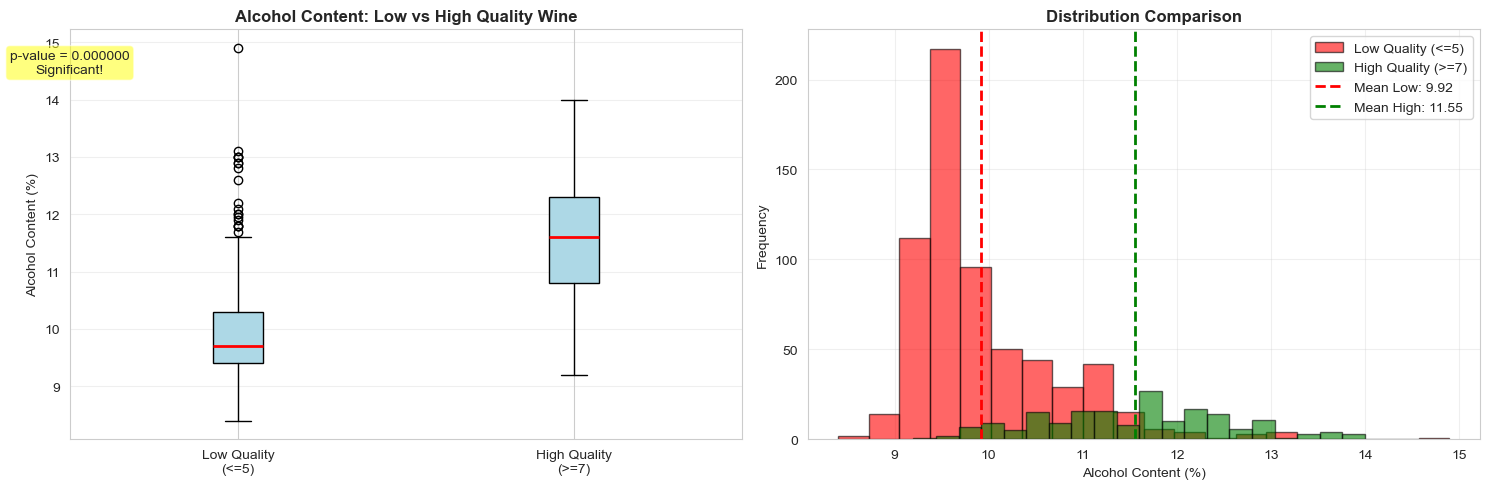

In [16]:
# Visualization of hypothesis test
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot comparison
data_to_plot = [low_quality, high_quality]
axes[0].boxplot(data_to_plot, labels=['Low Quality\n(<=5)', 'High Quality\n(>=7)'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('Alcohol Content (%)')
axes[0].set_title('Alcohol Content: Low vs High Quality Wine', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add statistical annotation
axes[0].text(0.5, axes[0].get_ylim()[1]*0.95, 
             f'p-value = {p_value:.6f}\nSignificant!' if p_value < 0.05 else f'p-value = {p_value:.6f}',
             ha='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='yellow' if p_value < 0.05 else 'gray', alpha=0.5))

# Distribution comparison
axes[1].hist(low_quality, bins=20, alpha=0.6, label='Low Quality (<=5)', color='red', edgecolor='black')
axes[1].hist(high_quality, bins=20, alpha=0.6, label='High Quality (>=7)', color='green', edgecolor='black')
axes[1].axvline(low_quality.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean Low: {low_quality.mean():.2f}')
axes[1].axvline(high_quality.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean High: {high_quality.mean():.2f}')
axes[1].set_xlabel('Alcohol Content (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution Comparison', fontweight='bold', fontsize=12)
axes[1].legend(loc='upper right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Additional: Correlation Test
print("\n🔗 ANALISIS TAMBAHAN: Correlation Test")
print("="*60)

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df_clean['alcohol'], df_clean['quality'])
print(f"\nPearson Correlation:")
print(f"  r = {pearson_corr:.4f}")
print(f"  p-value = {pearson_p:.6f}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(df_clean['alcohol'], df_clean['quality'])
print(f"\nSpearman Correlation:")
print(f"  ρ = {spearman_corr:.4f}")
print(f"  p-value = {spearman_p:.6f}")

if pearson_p < 0.05:
    print(f"\n✅ Korelasi signifikan! Ada hubungan positif yang kuat antara")
    print(f"   alcohol content dan quality rating.")


🔗 ANALISIS TAMBAHAN: Correlation Test

Pearson Correlation:
  r = 0.4803
  p-value = 0.000000

Spearman Correlation:
  ρ = 0.4880
  p-value = 0.000000

✅ Korelasi signifikan! Ada hubungan positif yang kuat antara
   alcohol content dan quality rating.


## [8] Kesimpulan & Langkah Selanjutnya

### 📌 Kesimpulan Utama:

1. **Alcohol Content Sangat Penting**
   - Terbukti secara statistik bahwa wine berkualitas tinggi memiliki alcohol content lebih tinggi
   - P-value sangat kecil menunjukkan signifikansi yang kuat
   - Effect size menunjukkan perbedaan yang meaningful

2. **Kualitas Wine Dapat Diprediksi**
   - Beberapa fitur (alcohol, volatile acidity, sulphates) memiliki korelasi kuat dengan quality
   - Data cukup untuk membangun model prediktif

3. **Data Sudah Bersih dan Siap**
   - Tidak ada missing values
   - Outliers dipertahankan karena representatif
   - Feature engineering telah dilakukan

4. **Tantangan: Imbalanced Data**
   - Distribusi quality tidak seimbang
   - Perlu strategi khusus untuk handling (SMOTE, class weights, etc.)

### 🚀 Langkah Selanjutnya untuk Machine Learning:

#### 1. **Feature Selection**
   - Gunakan top features: alcohol, volatile acidity, sulphates, citric acid
   - Pertimbangkan feature engineering results

#### 2. **Model yang Direkomendasikan**
   - **Random Forest Classifier** - Handle non-linear relationships well
   - **Gradient Boosting** - High accuracy untuk tabular data
   - **Support Vector Machine** - Good untuk classification tasks

#### 3. **Data Preparation**
   - Train-test split (80:20)
   - Standardization menggunakan StandardScaler
   - Handle imbalanced classes dengan SMOTE atau class_weight

#### 4. **Evaluation Metrics**
   - **Classification:**
     - Accuracy (overall performance)
     - F1-Score (balanced precision & recall)
     - Confusion Matrix (per-class performance)
   - **Regression:**
     - RMSE (Root Mean Squared Error)
     - MAE (Mean Absolute Error)
     - R² Score

#### 5. **Hyperparameter Tuning**
   - GridSearchCV atau RandomizedSearchCV
   - Cross-validation (k=5 atau k=10)

#### 6. **Model Interpretation**
   - Feature importance analysis
   - SHAP values untuk explainability

### 📚 Lessons Learned:

- EDA sangat penting untuk memahami data sebelum modeling
- Hypothesis testing memberikan validasi statistik untuk insights
- Feature engineering dapat meningkatkan performa model
- Domain knowledge (wine chemistry) membantu interpretasi

### ✅ Deliverables Completed:

- ✅ [1] Ringkasan Dataset
- ✅ [2] Rencana Eksplorasi Data
- ✅ [3] Analisis Data Eksploratif
- ✅ [4] Pembersihan Data & Feature Engineering
- ✅ [5] Temuan Kunci & Wawasan
- ✅ [6] Formulasi Hipotesis
- ✅ [7] Pengujian Hipotesis & Analisis Signifikansi
- ✅ [8] Kesimpulan & Langkah Selanjutnya

---

**Dataset:** Red Wine Quality (1599 samples, 11 features)

**Target:** Quality Rating (3-8)

**Status:** Ready for Machine Learning Implementation 🎯